<a href="https://colab.research.google.com/github/693080593/research/blob/master/3_Sets_Polynomial(Tricomponent)_Cheng_2021_Modified_121820_%5B2%5D_cHB_Mcl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080620 Polynomial Cheng 2021 Modified (Tricomponent) 121820.csv')
Original_Oil_Yields = data['Bio-crude Oil Yield']
Original_Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude dataset has 225 data points with 32 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,ProHemi,ProCarb,ProAsh,CellCarb,CellLig,HemiCarb,HemiLig,CarbLig,LigAsh,ProCellCarb,ProCellLig,ProCellAsh,ProHemiLig,ProCarbLig,ProCarbAsh,ProLigAsh,CellCarbLig,CellLigAsh,HemiCarbAsh,LipProLig,LipProAsh,LipCellLig,LipCellAsh,LipCarbLig,Bio-crude Oil Yield
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,85.50
30,30.9,27.3,0.0,0.0,32.7,0.0,9.1,0.0,8.9271,2.4843,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.812366,0.0,0.0,0.0,0.0,0.0,0.767649,0.0,0.0,0.0,41.00
60,13.3,25.5,0.0,0.0,38.7,0.0,0.0,0.0,9.8685,0.0000,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,27.10
90,6.5,65.2,0.0,0.0,20.7,0.0,8.0,0.0,13.4964,5.2160,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.079712,0.0,0.0,0.0,0.0,0.0,0.339040,0.0,0.0,0.0,38.00
120,1.9,23.4,66.4,0.0,8.0,0.0,0.0,0.0,1.8720,0.0000,5.312,0.0000,0.0,0.0000,0.0,0.0,1.243008,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,23.60
150,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.30
180,0.0,0.0,39.2,35.1,0.0,20.2,0.0,0.0,0.0000,0.0000,0.000,7.9184,0.0,7.0902,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,26.98
210,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,6.50


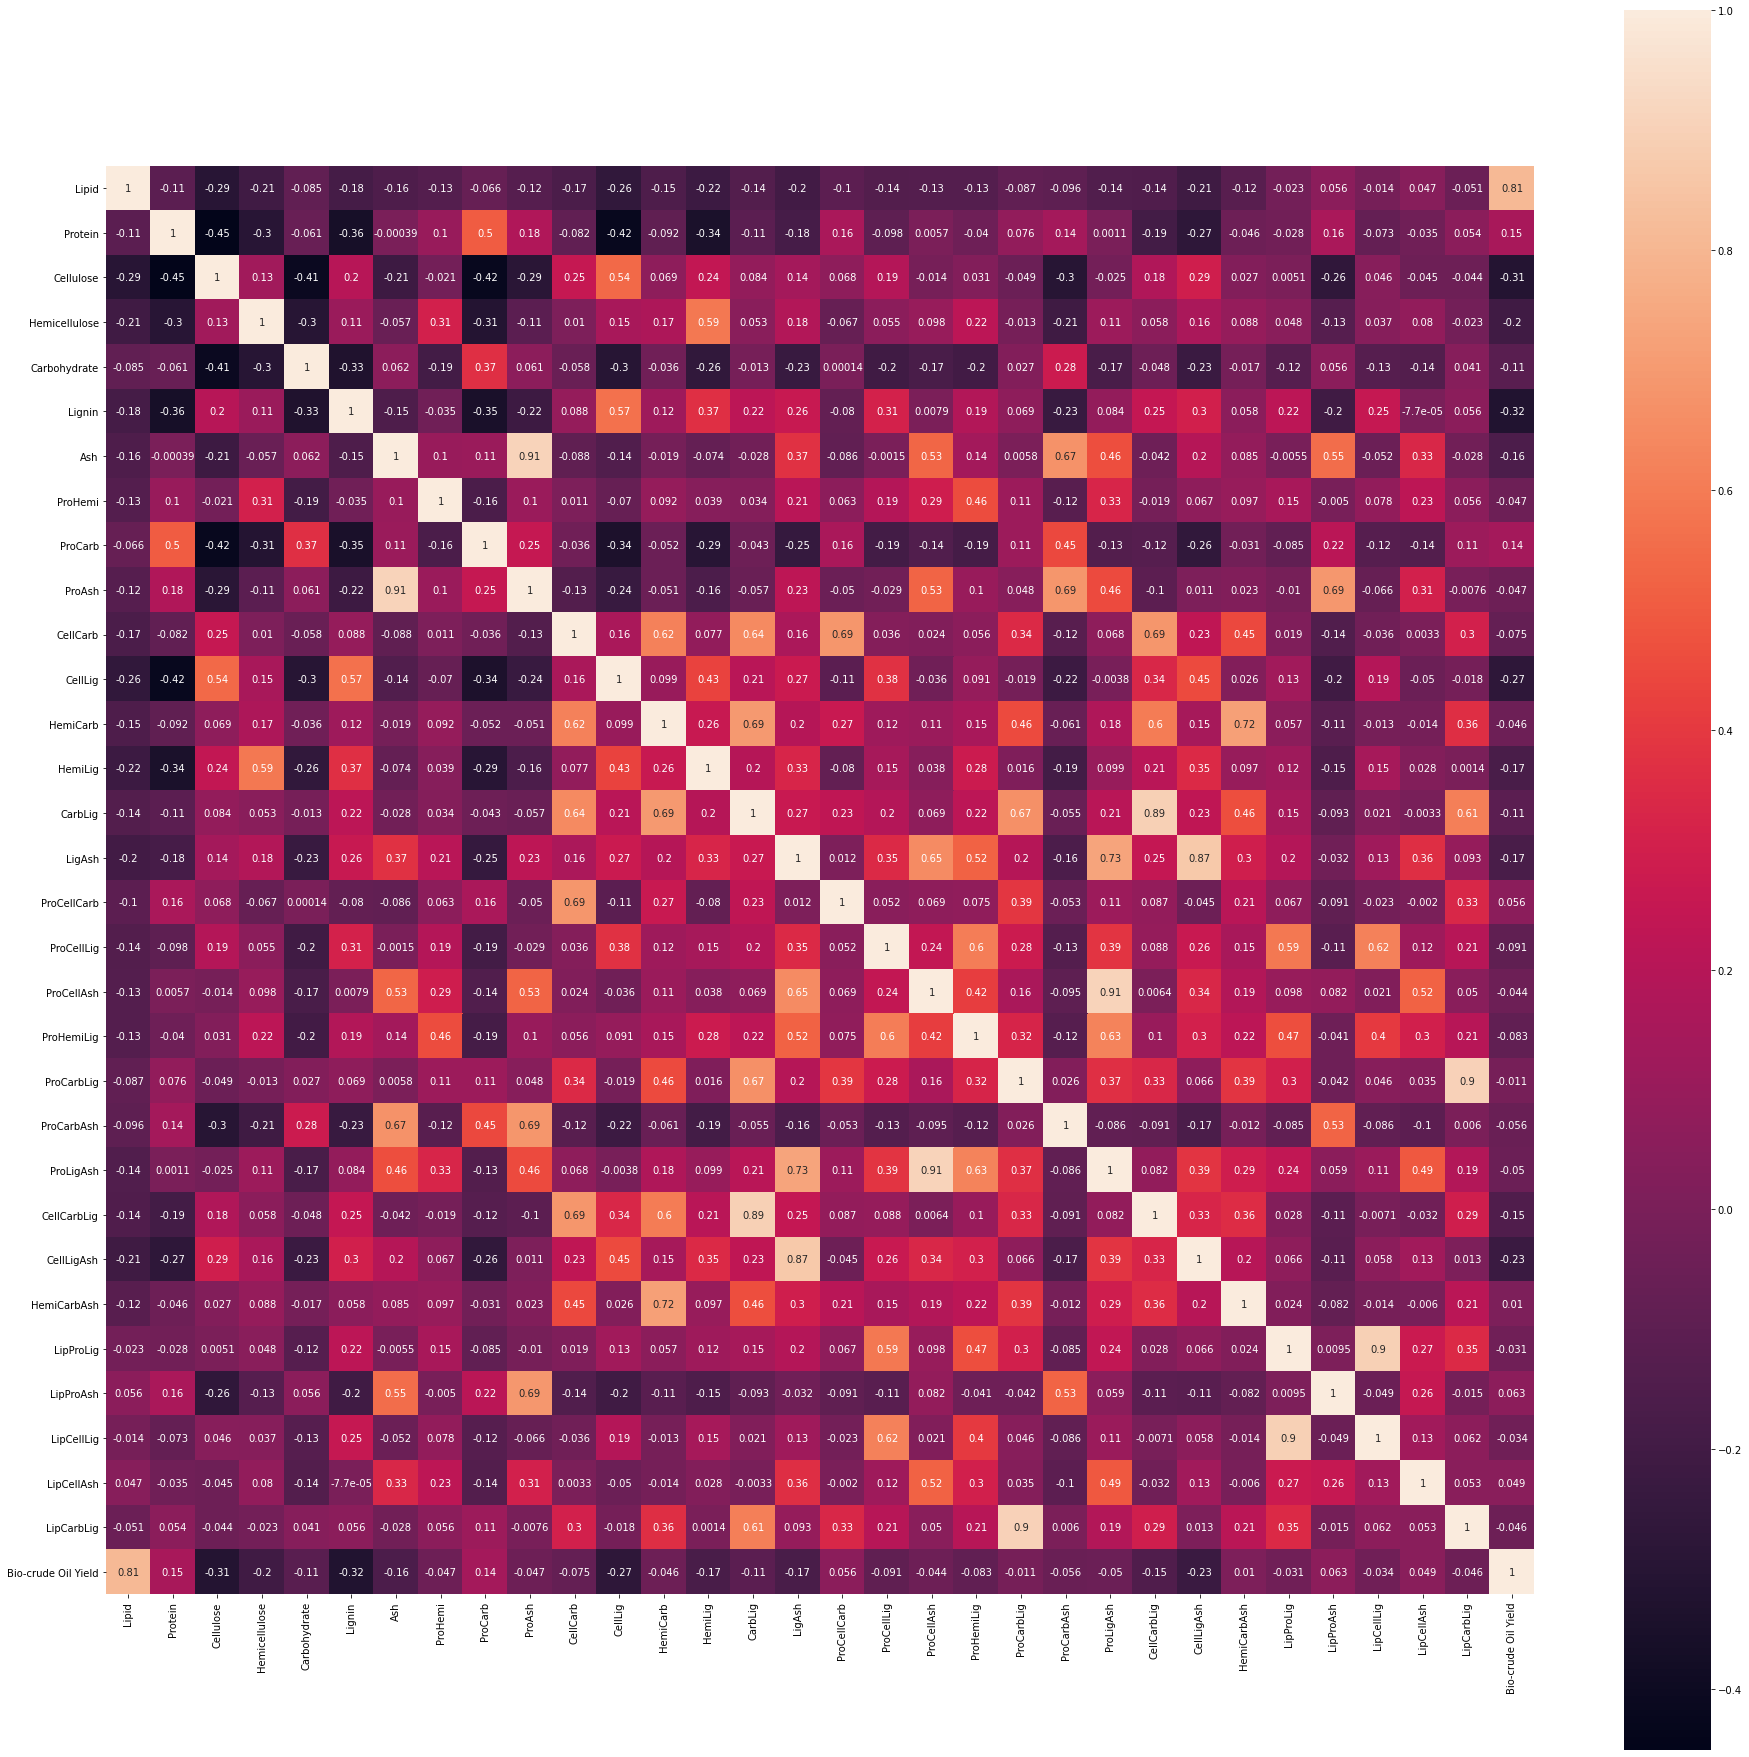

In [2]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(32,32))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [3]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)


In [4]:
# Model set up
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)


# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

LR_intercept_all=[]
LR_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    # Model instantiation
    LR=LinearRegression()
    
    # Model training
    LR.fit(X_train,y_train)

    #print ("Intercept: ",LR.intercept_)
    #print ("Regression coefficient: ",LR.coef_)

    # Predict training set and test set
    y_train_predict = LR.predict(X_train)
    y_test_predict = LR.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    LR_intercept_all.append(LR.intercept_)
    LR_coef_all.append(LR.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of LR.intercept",np.mean(LR_intercept_all))
print("Standard deviation of LR.intercept",np.std(LR_intercept_all))
print("Mean values of LR.coef",np.mean(LR_coef_all, axis=0))
print("Standard deviations of LR.coef",np.std(LR_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
y_valid_predict = LR.predict(X_valid)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of LR.intercept 35.46153807907403
Standard deviation of LR.intercept 3.505421698384342
Mean values of LR.coef [ 5.21728679e-01 -1.30783888e-01 -2.23010064e-01 -2.88449524e-01
 -2.30097072e-01 -4.10462569e-01 -1.03520306e+00  4.74752251e-01
  2.32876750e-01  1.42160365e+00 -1.76242514e-01  2.28874840e-01
 -2.73341794e-01  1.68738216e+00 -6.99016712e+00  1.16500941e+01
  4.08362437e+00  7.09621207e+00  2.28051877e+01 -8.45438059e+00
  3.85453425e+01  5.41876358e+00 -5.49441075e+01  2.13317477e+01
 -2.59119283e+01  3.83726350e+01  1.24229327e+01 -1.51902205e+00
 -1.28429487e+01  2.59394140e+01 -1.71909820e+02]
Standard deviations of LR.coef [5.47396882e-02 3.15040667e-02 3.49708169e-02 2.88088691e-02
 3.49811939e-02 5.44621839e-02 6.47677382e-02 2.17519785e-01
 7.93346693e-02 4.18016002e-01 6.27631536e-01 6.95523720e-02
 1.16333413e+00 2.65460730e-01 5.14699722e+00 8.98714969e+00
 1.80060281e+00 1.58419200e+00 4.22293599e+00 2.16264485e+00
 1.75599091e+01 6.81064826e-01 2.76605

Text(0.5, 1.0, 'y_pred vs. y_true')

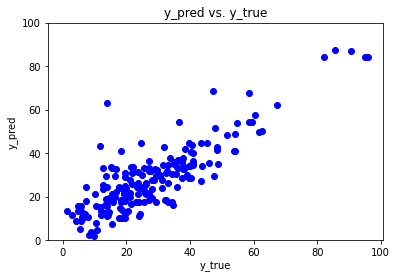

In [5]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_MLR.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

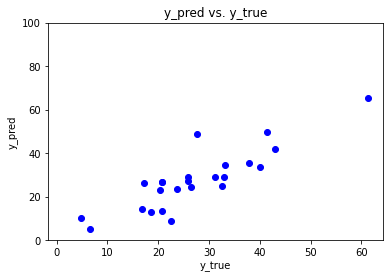

In [6]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [7]:
# Linearity test
from pandas import Series
from scipy.stats import f

from scipy.stats import t

# Model set up
from sklearn.linear_model import LinearRegression

# TODO: Import 'KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

y_train_f_all=[]
p_all=[]
cr_value_all=[]

limit_all=[]

tvalue1_all=[]
pvalue1_all=[]
tvalue2_all=[]
pvalue2_all=[]
tvalue3_all=[]
pvalue3_all=[]
tvalue4_all=[]
pvalue4_all=[]
tvalue5_all=[]
pvalue5_all=[]
tvalue6_all=[]
pvalue6_all=[]
tvalue7_all=[]
pvalue7_all=[]
tvalue8_all=[]
pvalue8_all=[]
tvalue9_all=[]
pvalue9_all=[]
tvalue10_all=[]
pvalue10_all=[]
tvalue11_all=[]
pvalue11_all=[]
tvalue12_all=[]
pvalue12_all=[]
tvalue13_all=[]
pvalue13_all=[]

tvalue14_all=[]
pvalue14_all=[]
tvalue15_all=[]
pvalue15_all=[]
tvalue16_all=[]
pvalue16_all=[]
tvalue17_all=[]
pvalue17_all=[]
tvalue18_all=[]
pvalue18_all=[]
tvalue19_all=[]
pvalue19_all=[]
tvalue20_all=[]
pvalue20_all=[]

tvalue21_all=[]
pvalue21_all=[]
tvalue22_all=[]
pvalue22_all=[]
tvalue23_all=[]
pvalue23_all=[]
tvalue24_all=[]
pvalue24_all=[]
tvalue25_all=[]
pvalue25_all=[]
tvalue26_all=[]
pvalue26_all=[]
tvalue27_all=[]
pvalue27_all=[]
tvalue28_all=[]
pvalue28_all=[]

tvalue29_all=[]
pvalue29_all=[]
tvalue30_all=[]
pvalue30_all=[]
tvalue31_all=[]
pvalue31_all=[]


# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    # Model instantiation
    LR=LinearRegression()
    
    # Model training
    LR.fit(X_train,y_train)

    #print ("Intercept: ",LR.intercept_)
    #print ("Regression coefficient: ",LR.coef_)

    # Predict training set and test set
    y_train_predict = LR.predict(X_train)
    y_test_predict = LR.predict(X_test)

    # array was converted into series format
    y_train_predict = Series(y_train_predict, index=y_train.index)
    
    # SSR and SSE were estimated in the training data
    y_train_ssr = y_train_predict.apply(lambda x:(x-y_train.mean())**2).sum()
    y_train_sse = y_train.sub(y_train_predict).apply(lambda x:x**2).sum()
    
    # dn is the degree of freedom of SSR, df is the degree of freedom of SSE 
    dn = 31
    df = y_train.shape[0] - dn - 1
    
    # F value is estimated
    y_train_f = (y_train_ssr/dn)/(y_train_sse/df)
    
    # P value is estimated
    p = f.sf(y_train_f, dn, df)
    
    # Critical value of significance level of 0.05 was estimated
    cr_value = f.isf(0.05,dn,df)
    
    # print('F value of training set: ',y_train_f)
    # print('P value of training set:%.02f'%p)
    # print('Critical value of significance level of 0.05: ',cr_value)
    
    def get_tvalue(sse,df,matr,beta,i):
      '''t value is estimated'''
      mse = sse / df
      sbeta = sqrt(matr[i+1,i+1]*mse)
      t=beta/sbeta
      return t
    
    limit = t.isf(0.025,df)
    #print('Critical value of significance level of 0.05:',limit)
    
    X_train['B']=1
    X_train = X_train.reindex(columns=['B','Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash','ProHemi',
                                       'ProCarb','ProAsh','CellCarb','CellLig','HemiCarb','HemiLig','CarbLig','LigAsh','ProCellCarb','ProCellLig','ProCellAsh',
                                       'ProHemiLig','ProCarbLig','ProCarbAsh','ProLigAsh','CellCarbLig','CellLigAsh',
                                       'HemiCarbAsh','LipProLig','LipProAsh','LipCellLig',
                                       'LipCellAsh','LipCarbLig'])
    
    # Matrix Conversion
    xm = np.mat(X_train)
    
    # Inverse matrix (X' X) was estimated
    xmi = np.dot(xm.T, xm).I
    index,betas = range(31),LR.coef_
    
    tvalue1 = get_tvalue(y_train_sse,df,xmi,LR.coef_[0],0)
    pvalue1 = t.sf(abs(tvalue1),df)*2
    #print('t value of beta 1:',tvalue1)
    #print('p value of beta 1:',pvalue1)
    
    tvalue2 = get_tvalue(y_train_sse,df,xmi,LR.coef_[1],1)
    pvalue2 = t.sf(abs(tvalue2),df)*2
    #print('t value of beta 2:',tvalue2)
    #print('p value of beta 2:',pvalue2)
    
    tvalue3 = get_tvalue(y_train_sse,df,xmi,LR.coef_[2],2)
    pvalue3 = t.sf(abs(tvalue3),df)*2
    #print('t value of beta 3:',tvalue3)
    #print('p value of beta 3:',pvalue3)
    
    tvalue4 = get_tvalue(y_train_sse,df,xmi,LR.coef_[3],3)
    pvalue4 = t.sf(abs(tvalue4),df)*2
    #print('t value of beta 4:',tvalue4)
    #print('p value of beta 4:',pvalue4)
    
    tvalue5 = get_tvalue(y_train_sse,df,xmi,LR.coef_[4],4)
    pvalue5 = t.sf(abs(tvalue5),df)*2
    #print('t value of beta 5:',tvalue5)
    #print('p value of beta 5:',pvalue5)
    
    tvalue6 = get_tvalue(y_train_sse,df,xmi,LR.coef_[5],5)
    pvalue6 = t.sf(abs(tvalue6),df)*2
    #print('t value of beta 6:',tvalue6)
    #print('p value of beta 6:',pvalue6)
    
    tvalue7 = get_tvalue(y_train_sse,df,xmi,LR.coef_[6],6)
    pvalue7 = t.sf(abs(tvalue7),df)*2
    #print('t value of beta 7:',tvalue7)
    #print('p value of beta 7:',pvalue7)

    tvalue8 = get_tvalue(y_train_sse,df,xmi,LR.coef_[7],7)
    pvalue8 = t.sf(abs(tvalue8),df)*2
    #print('t value of beta 8:',tvalue8)
    #print('p value of beta 8:',pvalue8)

    tvalue9 = get_tvalue(y_train_sse,df,xmi,LR.coef_[8],8)
    pvalue9 = t.sf(abs(tvalue9),df)*2
    #print('t value of beta 9:',tvalue9)
    #print('p value of beta 9:',pvalue9)

    tvalue10 = get_tvalue(y_train_sse,df,xmi,LR.coef_[9],9)
    pvalue10 = t.sf(abs(tvalue10),df)*2
    #print('t value of beta 10:',tvalue10)
    #print('p value of beta 10:',pvalue10)

    tvalue11 = get_tvalue(y_train_sse,df,xmi,LR.coef_[10],10)
    pvalue11 = t.sf(abs(tvalue11),df)*2
    #print('t value of beta 11:',tvalue11)
    #print('p value of beta 11:',pvalue11)

    tvalue12 = get_tvalue(y_train_sse,df,xmi,LR.coef_[11],11)
    pvalue12 = t.sf(abs(tvalue12),df)*2
    #print('t value of beta 12:',tvalue12)
    #print('p value of beta 12:',pvalue12)

    tvalue13 = get_tvalue(y_train_sse,df,xmi,LR.coef_[12],12)
    pvalue13 = t.sf(abs(tvalue13),df)*2
    #print('t value of beta 13:',tvalue13)
    #print('p value of beta 13:',pvalue13)

    tvalue14 = get_tvalue(y_train_sse,df,xmi,LR.coef_[13],13)
    pvalue14 = t.sf(abs(tvalue14),df)*2
    #print('t value of beta 14:',tvalue14)
    #print('p value of beta 14:',pvalue14)

    tvalue15 = get_tvalue(y_train_sse,df,xmi,LR.coef_[14],14)
    pvalue15 = t.sf(abs(tvalue15),df)*2
    #print('t value of beta 15:',tvalue15)
    #print('p value of beta 15:',pvalue15)

    tvalue16 = get_tvalue(y_train_sse,df,xmi,LR.coef_[15],15)
    pvalue16 = t.sf(abs(tvalue16),df)*2
    #print('t value of beta 16:',tvalue16)
    #print('p value of beta 16:',pvalue16)

    tvalue17 = get_tvalue(y_train_sse,df,xmi,LR.coef_[16],16)
    pvalue17 = t.sf(abs(tvalue17),df)*2
    #print('t value of beta 17:',tvalue17)
    #print('p value of beta 17:',pvalue17)

    tvalue18 = get_tvalue(y_train_sse,df,xmi,LR.coef_[17],17)
    pvalue18 = t.sf(abs(tvalue18),df)*2
    #print('t value of beta 18:',tvalue18)
    #print('p value of beta 18:',pvalue18)

    tvalue19 = get_tvalue(y_train_sse,df,xmi,LR.coef_[18],18)
    pvalue19 = t.sf(abs(tvalue19),df)*2
    #print('t value of beta 19:',tvalue19)
    #print('p value of beta 19:',pvalue19)

    tvalue20 = get_tvalue(y_train_sse,df,xmi,LR.coef_[19],19)
    pvalue20 = t.sf(abs(tvalue20),df)*2
    #print('t value of beta 20:',tvalue20)
    #print('p value of beta 20:',pvalue20)

    tvalue21 = get_tvalue(y_train_sse,df,xmi,LR.coef_[20],20)
    pvalue21 = t.sf(abs(tvalue21),df)*2
    #print('t value of beta 21:',tvalue21)
    #print('p value of beta 21:',pvalue21)

    tvalue22 = get_tvalue(y_train_sse,df,xmi,LR.coef_[21],21)
    pvalue22 = t.sf(abs(tvalue22),df)*2
    #print('t value of beta 22:',tvalue22)
    #print('p value of beta 22:',pvalue22)

    tvalue23 = get_tvalue(y_train_sse,df,xmi,LR.coef_[22],22)
    pvalue23 = t.sf(abs(tvalue23),df)*2
    #print('t value of beta 23:',tvalue23)
    #print('p value of beta 23:',pvalue23)

    tvalue24 = get_tvalue(y_train_sse,df,xmi,LR.coef_[23],23)
    pvalue24 = t.sf(abs(tvalue24),df)*2
    #print('t value of beta 24:',tvalue24)
    #print('p value of beta 24:',pvalue24)

    tvalue25 = get_tvalue(y_train_sse,df,xmi,LR.coef_[24],24)
    pvalue25 = t.sf(abs(tvalue25),df)*2
    #print('t value of beta 25:',tvalue25)
    #print('p value of beta 25:',pvalue25)

    tvalue26 = get_tvalue(y_train_sse,df,xmi,LR.coef_[25],25)
    pvalue26 = t.sf(abs(tvalue26),df)*2
    #print('t value of beta 26:',tvalue26)
    #print('p value of beta 26:',pvalue26)

    tvalue27 = get_tvalue(y_train_sse,df,xmi,LR.coef_[26],26)
    pvalue27 = t.sf(abs(tvalue27),df)*2
    #print('t value of beta 27:',tvalue27)
    #print('p value of beta 27:',pvalue27)

    tvalue28 = get_tvalue(y_train_sse,df,xmi,LR.coef_[27],27)
    pvalue28 = t.sf(abs(tvalue28),df)*2
    #print('t value of beta 28:',tvalue28)
    #print('p value of beta 28:',pvalue28)

    tvalue29 = get_tvalue(y_train_sse,df,xmi,LR.coef_[28],28)
    pvalue29 = t.sf(abs(tvalue29),df)*2
    #print('t value of beta 29:',tvalue29)
    #print('p value of beta 29:',pvalue29)

    tvalue30 = get_tvalue(y_train_sse,df,xmi,LR.coef_[29],29)
    pvalue30 = t.sf(abs(tvalue30),df)*2
    #print('t value of beta 30:',tvalue30)
    #print('p value of beta 30:',pvalue30)

    tvalue31 = get_tvalue(y_train_sse,df,xmi,LR.coef_[30],30)
    pvalue31 = t.sf(abs(tvalue31),df)*2
    #print('t value of beta 31:',tvalue31)
    #print('p value of beta 31:',pvalue31)

    cnt += 1
    y_train_f_all.append(y_train_f)
    p_all.append(p)
    cr_value_all.append(cr_value)

    limit_all.append(limit)

    tvalue1_all.append(tvalue1)
    pvalue1_all.append(pvalue1)
    tvalue2_all.append(tvalue2)
    pvalue2_all.append(pvalue2)
    tvalue3_all.append(tvalue3)
    pvalue3_all.append(pvalue3)    
    tvalue4_all.append(tvalue4)
    pvalue4_all.append(pvalue4)
    tvalue5_all.append(tvalue5)
    pvalue5_all.append(pvalue5)    
    tvalue6_all.append(tvalue6)
    pvalue6_all.append(pvalue6)
    tvalue7_all.append(tvalue7)
    pvalue7_all.append(pvalue7)
    tvalue8_all.append(tvalue8)
    pvalue8_all.append(pvalue8)
    tvalue9_all.append(tvalue9)
    pvalue9_all.append(pvalue9)
    tvalue10_all.append(tvalue10)
    pvalue10_all.append(pvalue10)
    tvalue11_all.append(tvalue11)
    pvalue11_all.append(pvalue11)
    tvalue12_all.append(tvalue12)
    pvalue12_all.append(pvalue12)
    tvalue13_all.append(tvalue13)
    pvalue13_all.append(pvalue13)

    tvalue14_all.append(tvalue14)
    pvalue14_all.append(pvalue14)
    tvalue15_all.append(tvalue15)
    pvalue15_all.append(pvalue15)
    tvalue16_all.append(tvalue16)
    pvalue16_all.append(pvalue16)    
    tvalue17_all.append(tvalue17)
    pvalue17_all.append(pvalue17)
    tvalue18_all.append(tvalue18)
    pvalue18_all.append(pvalue18)    
    tvalue19_all.append(tvalue19)
    pvalue19_all.append(pvalue19)
    tvalue20_all.append(tvalue20)
    pvalue20_all.append(pvalue20)

    tvalue21_all.append(tvalue21)
    pvalue21_all.append(pvalue21)
    tvalue22_all.append(tvalue22)
    pvalue22_all.append(pvalue22)
    tvalue23_all.append(tvalue23)
    pvalue23_all.append(pvalue23)
    tvalue24_all.append(tvalue24)
    pvalue24_all.append(pvalue24)
    tvalue25_all.append(tvalue25)
    pvalue25_all.append(pvalue25)
    tvalue26_all.append(tvalue26)
    pvalue26_all.append(pvalue26)
    tvalue27_all.append(tvalue27)
    pvalue27_all.append(pvalue27)
    tvalue28_all.append(tvalue28)
    pvalue28_all.append(pvalue28)

    tvalue29_all.append(tvalue29)
    pvalue29_all.append(pvalue29)
    tvalue30_all.append(tvalue30)
    pvalue30_all.append(pvalue30)
    tvalue31_all.append(tvalue31)
    pvalue31_all.append(pvalue31)


print("Mean value of F value of training set:",np.mean(y_train_f_all))
print("Standard deviation of F value of training set:",np.std(y_train_f_all))
print("Mean values of P value of training set:",np.mean(p_all))
print("Standard deviations of P value of training set:",np.std(p_all))
print("Mean value of Critical value of significance level of 0.05:", np.mean(cr_value_all))
print("Standard deviation of Critical value of significance level of 0.05:", np.std(cr_value_all))
print("")
print("Mean value of critical value of significance level of 0.05:",np.mean(limit_all))
print("Standard deviation of critical value of significance level of 0.05:",np.std(limit_all))
print("")
print("Mean value of t value of beta 1:",np.mean(tvalue1_all))
print("Standard deviation of t value of beta 1:",np.std(tvalue1_all))
print("Mean value of p value of beta 1:",np.mean(pvalue1_all))
print("Standard deviation of p value of beta 1:",np.std(pvalue1_all))
print("")
print("Mean value of t value of beta 2:",np.mean(tvalue2_all))
print("Standard deviation of t value of beta 2:",np.std(tvalue2_all))
print("Mean value of p value of beta 2:",np.mean(pvalue2_all))
print("Standard deviation of p value of beta 2:",np.std(pvalue2_all))
print("")
print("Mean value of t value of beta 3:",np.mean(tvalue3_all))
print("Standard deviation of t value of beta 3:",np.std(tvalue3_all))
print("Mean value of p value of beta 3:",np.mean(pvalue3_all))
print("Standard deviation of p value of beta 3:",np.std(pvalue3_all))
print("")
print("Mean value of t value of beta 4:",np.mean(tvalue4_all))
print("Standard deviation of t value of beta 4:",np.std(tvalue4_all))
print("Mean value of p value of beta 4:",np.mean(pvalue4_all))
print("Standard deviation of p value of beta 4:",np.std(pvalue4_all))
print("")
print("Mean value of t value of beta 5:",np.mean(tvalue5_all))
print("Standard deviation of t value of beta 5:",np.std(tvalue5_all))
print("Mean value of p value of beta 5:",np.mean(pvalue5_all))
print("Standard deviation of p value of beta 5:",np.std(pvalue5_all))
print("")
print("Mean value of t value of beta 6:",np.mean(tvalue6_all))
print("Standard deviation of t value of beta 6:",np.std(tvalue6_all))
print("Mean value of p value of beta 6:",np.mean(pvalue6_all))
print("Standard deviation of p value of beta 6:",np.std(pvalue6_all))
print("")
print("Mean value of t value of beta 7:",np.mean(tvalue7_all))
print("Standard deviation of t value of beta 7:",np.std(tvalue7_all))
print("Mean value of p value of beta 7:",np.mean(pvalue7_all))
print("Standard deviation of p value of beta 7:",np.std(pvalue7_all))
print("")
print("Mean value of t value of beta 8:",np.mean(tvalue8_all))
print("Standard deviation of t value of beta 8:",np.std(tvalue8_all))
print("Mean value of p value of beta 8:",np.mean(pvalue8_all))
print("Standard deviation of p value of beta 8:",np.std(pvalue8_all))
print("")
print("Mean value of t value of beta 9:",np.mean(tvalue9_all))
print("Standard deviation of t value of beta 9:",np.std(tvalue9_all))
print("Mean value of p value of beta 9:",np.mean(pvalue9_all))
print("Standard deviation of p value of beta 9:",np.std(pvalue9_all))
print("")
print("Mean value of t value of beta 10:",np.mean(tvalue10_all))
print("Standard deviation of t value of beta 10:",np.std(tvalue10_all))
print("Mean value of p value of beta 10:",np.mean(pvalue10_all))
print("Standard deviation of p value of beta 10:",np.std(pvalue10_all))
print("")
print("Mean value of t value of beta 11:",np.mean(tvalue11_all))
print("Standard deviation of t value of beta 11:",np.std(tvalue11_all))
print("Mean value of p value of beta 11:",np.mean(pvalue11_all))
print("Standard deviation of p value of beta 11:",np.std(pvalue11_all))
print("")
print("Mean value of t value of beta 12:",np.mean(tvalue12_all))
print("Standard deviation of t value of beta 12:",np.std(tvalue12_all))
print("Mean value of p value of beta 12:",np.mean(pvalue12_all))
print("Standard deviation of p value of beta 12:",np.std(pvalue12_all))
print("")
print("Mean value of t value of beta 13:",np.mean(tvalue13_all))
print("Standard deviation of t value of beta 13:",np.std(tvalue13_all))
print("Mean value of p value of beta 13:",np.mean(pvalue13_all))
print("Standard deviation of p value of beta 13:",np.std(pvalue13_all))

print("")
print("Mean value of t value of beta 14:",np.mean(tvalue14_all))
print("Standard deviation of t value of beta 14:",np.std(tvalue14_all))
print("Mean value of p value of beta 14:",np.mean(pvalue14_all))
print("Standard deviation of p value of beta 14:",np.std(pvalue14_all))
print("")
print("Mean value of t value of beta 15:",np.mean(tvalue15_all))
print("Standard deviation of t value of beta 15:",np.std(tvalue15_all))
print("Mean value of p value of beta 15:",np.mean(pvalue15_all))
print("Standard deviation of p value of beta 15:",np.std(pvalue15_all))
print("")
print("Mean value of t value of beta 16:",np.mean(tvalue16_all))
print("Standard deviation of t value of beta 16:",np.std(tvalue16_all))
print("Mean value of p value of beta 16:",np.mean(pvalue16_all))
print("Standard deviation of p value of beta 16:",np.std(pvalue16_all))
print("")
print("Mean value of t value of beta 17:",np.mean(tvalue17_all))
print("Standard deviation of t value of beta 17:",np.std(tvalue17_all))
print("Mean value of p value of beta 17:",np.mean(pvalue17_all))
print("Standard deviation of p value of beta 17:",np.std(pvalue17_all))
print("")
print("Mean value of t value of beta 18:",np.mean(tvalue18_all))
print("Standard deviation of t value of beta 18:",np.std(tvalue18_all))
print("Mean value of p value of beta 18:",np.mean(pvalue18_all))
print("Standard deviation of p value of beta 18:",np.std(pvalue18_all))
print("")
print("Mean value of t value of beta 19:",np.mean(tvalue19_all))
print("Standard deviation of t value of beta 19:",np.std(tvalue19_all))
print("Mean value of p value of beta 19:",np.mean(pvalue19_all))
print("Standard deviation of p value of beta 19:",np.std(pvalue19_all))
print("")
print("Mean value of t value of beta 20:",np.mean(tvalue20_all))
print("Standard deviation of t value of beta 20:",np.std(tvalue20_all))
print("Mean value of p value of beta 20:",np.mean(pvalue20_all))
print("Standard deviation of p value of beta 20:",np.std(pvalue20_all))
print("")
print("Mean value of t value of beta 21:",np.mean(tvalue21_all))
print("Standard deviation of t value of beta 21:",np.std(tvalue21_all))
print("Mean value of p value of beta 21:",np.mean(pvalue21_all))
print("Standard deviation of p value of beta 21:",np.std(pvalue21_all))
print("")
print("Mean value of t value of beta 22:",np.mean(tvalue22_all))
print("Standard deviation of t value of beta 22:",np.std(tvalue22_all))
print("Mean value of p value of beta 22:",np.mean(pvalue22_all))
print("Standard deviation of p value of beta 22:",np.std(pvalue22_all))
print("")
print("Mean value of t value of beta 23:",np.mean(tvalue23_all))
print("Standard deviation of t value of beta 23:",np.std(tvalue23_all))
print("Mean value of p value of beta 23:",np.mean(pvalue23_all))
print("Standard deviation of p value of beta 23:",np.std(pvalue23_all))
print("")
print("Mean value of t value of beta 24:",np.mean(tvalue24_all))
print("Standard deviation of t value of beta 24:",np.std(tvalue24_all))
print("Mean value of p value of beta 24:",np.mean(pvalue24_all))
print("Standard deviation of p value of beta 24:",np.std(pvalue24_all))
print("")
print("Mean value of t value of beta 25:",np.mean(tvalue25_all))
print("Standard deviation of t value of beta 25:",np.std(tvalue25_all))
print("Mean value of p value of beta 25:",np.mean(pvalue25_all))
print("Standard deviation of p value of beta 25:",np.std(pvalue25_all))
print("")
print("Mean value of t value of beta 26:",np.mean(tvalue26_all))
print("Standard deviation of t value of beta 26:",np.std(tvalue26_all))
print("Mean value of p value of beta 26:",np.mean(pvalue26_all))
print("Standard deviation of p value of beta 26:",np.std(pvalue26_all))
print("")
print("Mean value of t value of beta 27:",np.mean(tvalue27_all))
print("Standard deviation of t value of beta 27:",np.std(tvalue27_all))
print("Mean value of p value of beta 27:",np.mean(pvalue27_all))
print("Standard deviation of p value of beta 27:",np.std(pvalue27_all))
print("")
print("Mean value of t value of beta 28:",np.mean(tvalue28_all))
print("Standard deviation of t value of beta 28:",np.std(tvalue28_all))
print("Mean value of p value of beta 28:",np.mean(pvalue28_all))
print("Standard deviation of p value of beta 28:",np.std(pvalue28_all))

print("")
print("Mean value of t value of beta 29:",np.mean(tvalue29_all))
print("Standard deviation of t value of beta 29:",np.std(tvalue29_all))
print("Mean value of p value of beta 29:",np.mean(pvalue29_all))
print("Standard deviation of p value of beta 29:",np.std(pvalue29_all))
print("")
print("Mean value of t value of beta 30:",np.mean(tvalue30_all))
print("Standard deviation of t value of beta 30:",np.std(tvalue30_all))
print("Mean value of p value of beta 30:",np.mean(pvalue30_all))
print("Standard deviation of p value of beta 30:",np.std(pvalue30_all))
print("")
print("Mean value of t value of beta 31:",np.mean(tvalue31_all))
print("Standard deviation of t value of beta 31:",np.std(tvalue31_all))
print("Mean value of p value of beta 31:",np.mean(pvalue31_all))
print("Standard deviation of p value of beta 31:",np.std(pvalue31_all))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

Mean value of F value of training set: 23.08679093902922
Standard deviation of F value of training set: 2.82674353255969
Mean values of P value of training set: 2.0055137514640972e-35
Standard deviations of P value of training set: 3.480913893725937e-35
Mean value of Critical value of significance level of 0.05: 1.541064810736347
Standard deviation of Critical value of significance level of 0.05: 0.0

Mean value of critical value of significance level of 0.05: 1.9786708498163628
Standard deviation of critical value of significance level of 0.05: 2.220446049250313e-16

Mean value of t value of beta 1: 6.241860556004211
Standard deviation of t value of beta 1: 0.7517887619449618
Mean value of p value of beta 1: 1.0255022217632774e-07
Standard deviation of p value of beta 1: 1.3610901048764799e-07

Mean value of t value of beta 2: -1.5282063526139973
Standard deviation of t value of beta 2: 0.3302751709506239
Mean value of p value of beta 2: 0.1479314358940488
Standard deviation of p valu

In [ ]:
# No use now.
from scipy.stats import t
def get_tvalue(sse,df,matr,beta,i):
  '''t value is estimated'''
  mse = sse / df
  sbeta = sqrt(matr[i+1,i+1]*mse)
  t=beta/sbeta
  return t

limit = t.isf(0.025,df)
print('Critical value of significance level of 0.05:',limit)

X_train['B']=1
X_train = X_train.reindex(columns=['B','Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash'])

# Matrix Conversion
xm = np.mat(X_train)
# Inverse matrix (X' X) was estimated
xmi = np.dot(xm.T, xm).I
index,betas = range(7),LR.coef_
for i,beta in zip(index,betas):
  tvalue = get_tvalue(y_train_sse,df,xmi,beta,i)
  pvalue = t.sf(abs(tvalue),df)*2
  print('t value of beta {0}:'.format(i+1),tvalue)
  print('p value of beta {0}:'.format(i+1),pvalue)

Critical value of significance level of 0.05: 1.9738521694896138
t value of beta 1: 7.906727317908357
p value of beta 1: 3.051942527736688e-13
t value of beta 2: 0.5349233069620932
p value of beta 2: 0.593393753585497
t value of beta 3: -1.22148604882896
p value of beta 3: 0.22357361069937173
t value of beta 4: -1.4756312520006964
p value of beta 4: 0.14187118824092604
t value of beta 5: -1.904900178784825
p value of beta 5: 0.058461797886129804
t value of beta 6: -2.559159266362959
p value of beta 6: 0.011353796025142478
t value of beta 7: -1.7444270031922708
p value of beta 7: 0.08287096532486027


In [ ]:
# 1.Delete collinear variable
import pandas as pd
data = pd.read_csv('/content/Feed Effect on Biocrude Yield Data ML 080920.csv')

# Model set up
from sklearn.linear_model import LinearRegression

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

# 1.Delete collinear variable
# Assign data set
X1, y1 = data[['Lipid','Protein','Hemicellulose','Carbohydrate','Lignin','Ash']], data['Bio-crude Oil Yield']

np.random.seed(seed = 79)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

LR_intercept_all=[]
LR_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

y_p_all=[]

pvalue1_all=[]
pvalue2_all=[]
pvalue3_all=[]
pvalue4_all=[]
pvalue5_all=[]
pvalue6_all=[]


# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X1, y1):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = X1.iloc[train_index,:],X1.iloc[test_index,:]
    y_train, y_test = y1.iloc[train_index],y1.iloc[test_index]
    
    # Train the model, predict and estimate root_mean_square_error (RMSE) and Multiple coefficient of determination (R2)
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    inter,co = LR.intercept_, LR.coef_
    #print ("Intercept: ",LR.intercept_)
    #print ("Regression coefficient: ",LR.coef_)

    # Predict training set and test set
    y_train_predict = LR.predict(X_train)
    y_test_predict = LR.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")
    
    # Estimate P value of significance level of 0.05 in F test
    y_train_predict = Series(y_train_predict, index=y_train.index)
    y_train_ssr = y_train_predict.apply(lambda x:(x-y_train.mean())**2).sum()
    y_train_sse = y_train.sub(y_train_predict).apply(lambda x:x**2).sum()
    dn, df = 6, y_train.shape[0]-6-1
    y_train_f = (y_train_ssr/dn) / (y_train_sse/df)
    y_p = f.sf(y_train_f, dn, df)
    # print('P value of training set under significance level of 0.05 in F test：%.20f'% y_p)
    
    # Estimate p value under significance level of 0.05 in t test
    def get_t1value(sse,df,matr,beta,i):
      mse = sse / df
      sbeta = sqrt(matr[i+1,i+1]*mse)
      t = beta / sbeta
      return t
      
    X_train['B'] = 1
    X_train = X_train.reindex(columns=['B','Lipid','Protein','Hemicellulose','Carbohydrate','Lignin','Ash'])
    xm = np.mat(X_train)
    xmi = np.dot(xm.T,xm).I
    index, betas = range(6), LR.coef_

    tvalue1 = get_tvalue(y_train_sse,df,xmi,LR.coef_[0],0)
    pvalue1 = t.sf(abs(tvalue1),df)*2
    #print('t value of beta 1:',tvalue1)
    #print('P value of beta 1 under significance level of 0.05 in t test:',pvalue1)
    
    tvalue2 = get_tvalue(y_train_sse,df,xmi,LR.coef_[1],1)
    pvalue2 = t.sf(abs(tvalue2),df)*2
    #print('t value of beta 2:',tvalue2)
    #print('P value of beta 2 under significance level of 0.05 in t test:',pvalue2)
    
    tvalue3 = get_tvalue(y_train_sse,df,xmi,LR.coef_[2],2)
    pvalue3 = t.sf(abs(tvalue3),df)*2
    #print('t value of beta 3:',tvalue3)
    #print('P value of beta 3 under significance level of 0.05 in t test:',pvalue3)
    
    tvalue4 = get_tvalue(y_train_sse,df,xmi,LR.coef_[3],3)
    pvalue4 = t.sf(abs(tvalue4),df)*2
    #print('t value of beta 4:',tvalue4)
    #print('P value of beta 4 under significance level of 0.05 in t test:',pvalue4)
    
    tvalue5 = get_tvalue(y_train_sse,df,xmi,LR.coef_[4],4)
    pvalue5 = t.sf(abs(tvalue5),df)*2
    #print('t value of beta 5:',tvalue5)
    #print('P value of beta 5 under significance level of 0.05 in t test:',pvalue5)
    
    tvalue6 = get_tvalue(y_train_sse,df,xmi,LR.coef_[5],5)
    pvalue6 = t.sf(abs(tvalue6),df)*2
    #print('t value of beta 6:',tvalue6)
    #print('P value of beta 6 under significance level of 0.05 in t test:',pvalue6)

    cnt += 1
    LR_intercept_all.append(LR.intercept_)
    LR_coef_all.append(LR.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)  

    y_p_all.append(p)

    pvalue1_all.append(pvalue1)
    pvalue2_all.append(pvalue2)
    pvalue3_all.append(pvalue3)    
    pvalue4_all.append(pvalue4)
    pvalue5_all.append(pvalue5)    
    pvalue6_all.append(pvalue6)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of LR.intercept",np.mean(LR_intercept_all))
print("Standard deviation of LR.intercept",np.std(LR_intercept_all))
print("Mean values of LR.coef",np.mean(LR_coef_all, axis=0))
print("Standard deviations of LR.coef",np.std(LR_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))
print("")

print("Mean values of P value of training set under significance level of 0.05 in F test：",np.mean(y_p_all))
print("Standard deviations of P value of training set under significance level of 0.05 in F test：",np.std(y_p_all))
print("")


print("Mean value of P value of beta 1 under significance level of 0.05 in t test:",np.mean(pvalue1_all))
print("Standard deviation of P value of beta 1 under significance level of 0.05 in t test:",np.std(pvalue1_all))
print("")

print("Mean value of P value of beta 2 under significance level of 0.05 in t test:",np.mean(pvalue2_all))
print("Standard deviation of P value of beta 2 under significance level of 0.05 in t test:",np.std(pvalue2_all))
print("")

print("Mean value of P value of beta 3 under significance level of 0.05 in t test:",np.mean(pvalue3_all))
print("Standard deviation of P value of beta 3 under significance level of 0.05 in t test:",np.std(pvalue3_all))
print("")

print("Mean value of P value of beta 4 under significance level of 0.05 in t test:",np.mean(pvalue4_all))
print("Standard deviation of P value of beta 4 under significance level of 0.05 in t test:",np.std(pvalue4_all))
print("")

print("Mean value of P value of beta 5 under significance level of 0.05 in t test:",np.mean(pvalue5_all))
print("Standard deviation of P value of beta 5 under significance level of 0.05 in t test:",np.std(pvalue5_all))
print("")

print("Mean value of P value of beta 6 under significance level of 0.05 in t test:",np.mean(pvalue6_all))
print("Standard deviation of P value of beta 6 under significance level of 0.05 in t test:",np.std(pvalue6_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of LR.intercept 19.25081227935531
Standard deviation of LR.intercept 0.6546073788171377
Mean values of LR.coef [ 0.65538887  0.12008552  0.00796588 -0.05636635 -0.14449514 -0.08444063]
Standard deviations of LR.coef [0.01810964 0.00845066 0.04398212 0.00870246 0.01340606 0.00892533]

Mean value of MAE of training set 6.865008285115115
Standard deviation of MAE of training set 0.18999931731087844
Mean value of MAE of test set 7.159834691889854
Standard deviation of MAE of test set 0.7302078743256394

Mean value of RMSE of training set 8.599237095485918
Standard deviation of RMSE of training set 0.23062515629310015
Mean value of RMSE of test set 8.890098071426518
Standard deviation of RMSE of test set 0.9714412770013418

Mean value of R2 of training set 0.7348073814208478
Standard deviation of R2 of training set 0.016685168476174593
Mean value of R2 of test set 0.7097440737737358
Standard deviation of R2 of test set 0.06817596773655235

Mean value of MRE of training set 0.2502

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

Text(0.5, 1.0, 'y_pred vs. y_true')

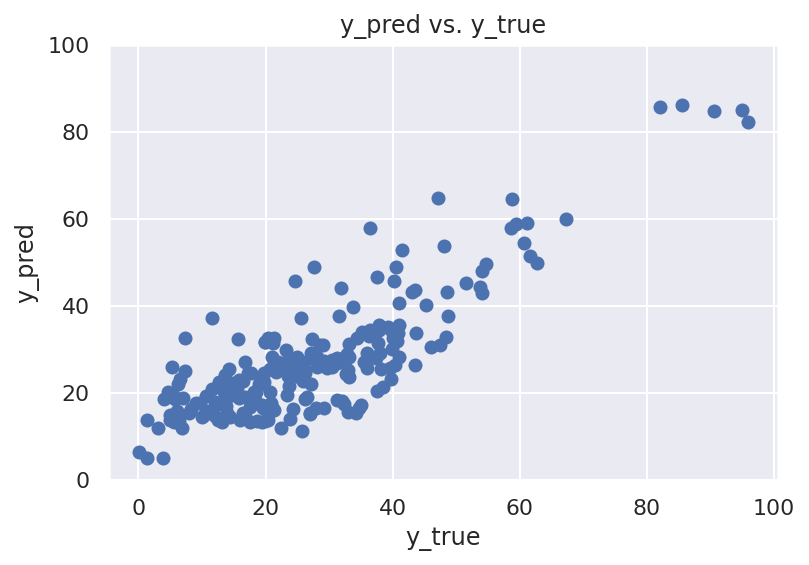

In [ ]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_MLR_DCV.csv', index = False, header=True)

RMSE of test set: 9.55163670623
Fit goodness of test set: 0.6385616589753638


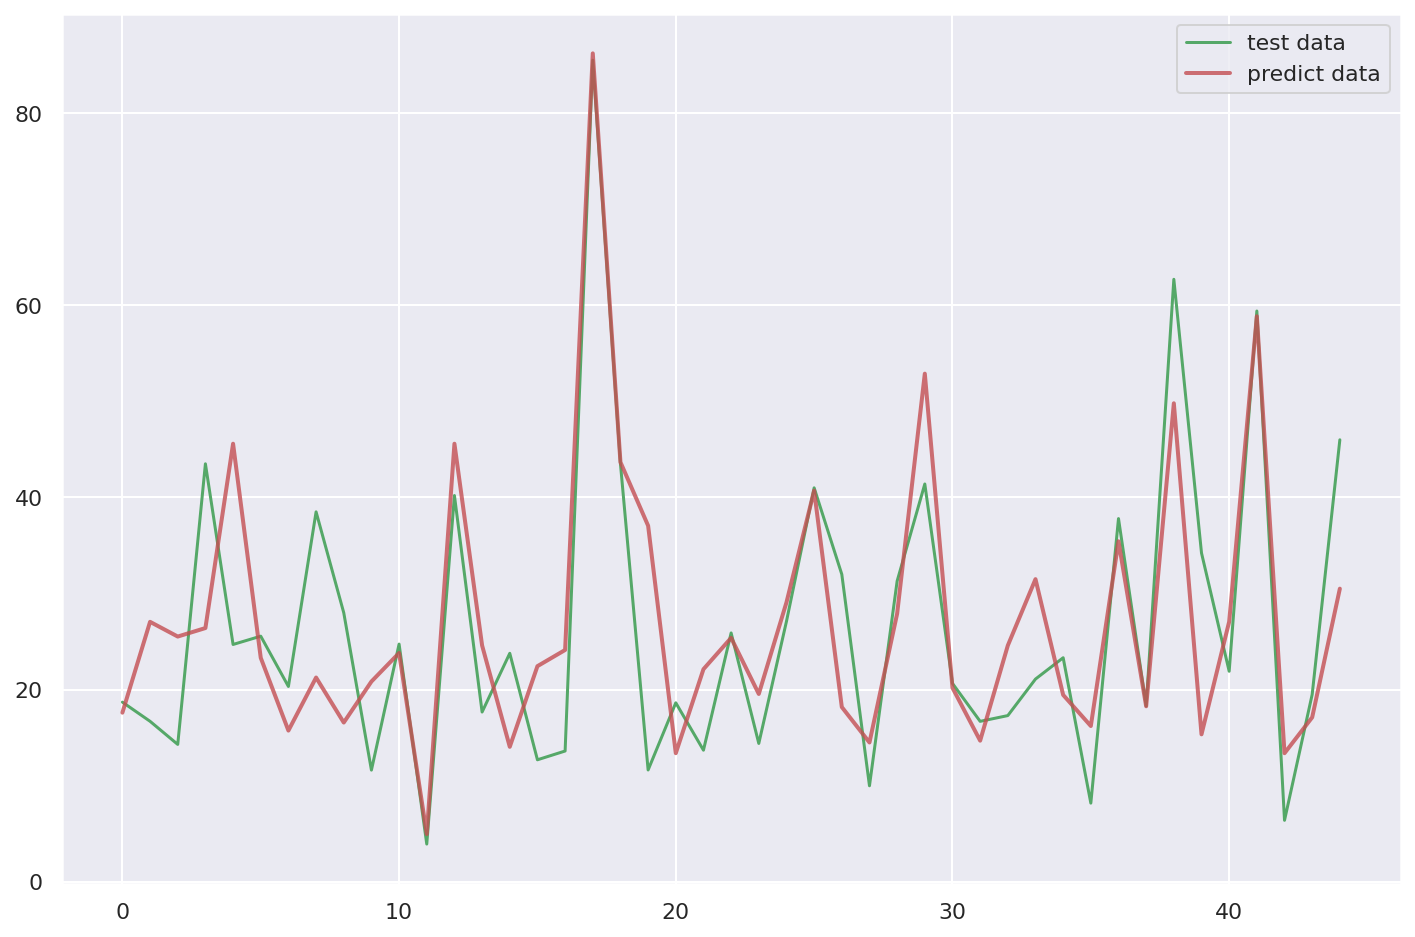

In [ ]:
# No use now.
# Model application
import matplotlib.pyplot as plt

# Prediction by the well-trained model
y1_test_pred = LR1.predict(X1_test)
y1_test_rmse = sqrt(metrics.mean_squared_error(y1_test,y1_test_pred))
y1_test_score = LR1.score(X1_test,y1_test)
print('RMSE of test set:', y1_test_rmse)
print('Fit goodness of test set:',y1_test_score)

# Draw plot
plt.figure(figsize=(12,8))
plt.plot(range(len(y1_test)),y1_test,'g',label='test data')
plt.plot(range(len(y1_test_pred)),y1_test_pred,'r',label='predict data',linewidth=2,alpha=0.8)
plt.legend()
plt.show()

In [ ]:
# No use now.
# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 14.5, 0, 10.4]]  # G.sulphuraria
# Show predictions
for i, Oil_Yield in enumerate(LR1.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Predicted bio-crude oil yield for the composition of Feedstock 1: 32.04 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 30.97 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 26.65 wt%


In [ ]:
# No use now.
for i in [0,1,2]:
  vs.PredictTrials(X1, y1, LR1.fit, feedstock_composition_data[i:i+1])

Trial 1: $32.06
Trial 2: $32.84
Trial 3: $32.26
Trial 4: $33.75
Trial 5: $32.87
Trial 6: $32.09
Trial 7: $32.08
Trial 8: $33.44
Trial 9: $32.15
Trial 10: $32.15

Range in prices: $1.69
Trial 1: $31.47
Trial 2: $32.51
Trial 3: $32.31
Trial 4: $32.01
Trial 5: $32.62
Trial 6: $31.57
Trial 7: $31.98
Trial 8: $32.23
Trial 9: $32.94
Trial 10: $31.74

Range in prices: $1.47
Trial 1: $26.36
Trial 2: $27.49
Trial 3: $26.58
Trial 4: $26.69
Trial 5: $27.13
Trial 6: $26.20
Trial 7: $26.64
Trial 8: $26.67
Trial 9: $27.08
Trial 10: $26.70

Range in prices: $1.29


In [ ]:
# No use now.
# 2.Logarithmic Transformation
import pandas as pd
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080920.csv')

data_log=np.log(data)

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))

# Assign data set
X2, y2 = data_log[['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash']], data_log['Bio-crude Oil Yield']

# Set the ratio of training set to test set as 80%:20%
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

# Train the model, predict and estimate root_mean_square_error (RMSE) and Multiple coefficient of determination (R2)
LR2 = LinearRegression()
LR2.fit (X2_train, y2_train)
inter, co = LR2.intercept_, LR2.coef_

# Prediction by the well-trained model
y2_train_pred = LR2.predict(X2_train)
y2_test_pred = LR2.predict(X2_test)

y2_train_score = LR2.score(X2_train, y2_train)
y2_test_score = LR2.score(X2_test,y2_test)

X2_train=np.exp(X2_train)
X2_test=np.exp(X2_test)
y2_train=np.exp(y2_train)
y2_train_pred=np.exp(y2_train_pred)
y2_test=np.exp(y2_test)
y2_test_pred=np.exp(y2_test_pred)

y2_train_rmse = sqrt(metrics.mean_squared_error(y2_train, y2_train_pred))
y2_test_rmse = sqrt(metrics.mean_squared_error(y2_test,y2_test_pred))

print("Regression model： Bio-crude Oil Yield={0}+{1}Lipid+{2}Protein+{3}Cellulose+{4}Hemicellulose+{5}Carbohydrate+{6}Lignin+{7}Ash".format(inter,co[0],co[1],co[2],co[3],co[4],co[5],co[6]))
print('RMSE of training set: ',y2_train_rmse)
print('Fit goodness of training set: ',y2_train_score)
print('RMSE of test set:', y2_test_rmse)
print('Fit goodness of test set:',y2_test_score)

# Estimate P value of significance level of 0.05 in F test
y2_train_pred = Series(y2_train_pred, index=y2_train.index)
y2_train_ssr = y2_train_pred.apply(lambda x:(x-y2_train.mean())**2).sum()
y2_train_sse = y2_train.sub(y2_train_pred).apply(lambda x:x**2).sum()
dn2, df2 = 7, y2_train.shape[0]-7-1
y2_train_f = (y2_train_ssr/dn2) / (y2_train_sse/df2)
y2_p = f.sf(y2_train_f, dn2, df2)

print('P value of training set under significance level of 0.05 in F test：%.20f'% y2_p)

# Estimate p value under significance level of 0.05 in t test
def get_t2value(sse,df,matr,beta,i):
  mse = sse / df
  sbeta = sqrt(matr[i+1,i+1]*mse)
  t = beta / sbeta
  return t
X2_train['B'] = 1
X2_train = X2_train.reindex(columns=['B','Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash'])
xm2 = np.mat(X2_train)
xmi2 = np.dot(xm2.T,xm2).I
index, betas = range(7), LR2.coef_
for i, beta in zip(index,betas):
  tvalue = get_t2value(y2_train_sse,df2,xmi2,beta,i)
  pvalue = t.sf(abs(tvalue),df2)*2
  print('P value of beta {0} under significance level of 0.05 in t test: '.format(i+1), pvalue)

Regression model： Bio-crude Oil Yield=3.209893976738809+0.10838509361118721Lipid+0.008643781040953856Protein+0.0318810121034202Cellulose+0.03187255224609155Hemicellulose+0.006880322963537423Carbohydrate+-0.04623234196750787Lignin+-0.008722542132973021Ash
RMSE of training set:  12.733882383197145
Fit goodness of training set:  0.42936346201767855
RMSE of test set: 17.8025165260382
Fit goodness of test set: 0.1422102146895856
P value of training set under significance level of 0.05 in F test：0.00000000000000000128
P value of beta 1 under significance level of 0.05 in t test:  0.3503557178188891
P value of beta 2 under significance level of 0.05 in t test:  0.9391691731231662
P value of beta 3 under significance level of 0.05 in t test:  0.765451042116243
P value of beta 4 under significance level of 0.05 in t test:  0.7994454091979346
P value of beta 5 under significance level of 0.05 in t test:  0.9494108345736956
P value of beta 6 under significance level of 0.05 in t test:  0.68590667